In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
#importing basic packages
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data = pd.read_csv('combined_dataset.csv')
# Sorting columns in alphabetical order
data = data.reindex(sorted(data.columns), axis=1)
data.head()

,asn,domain_in_ip,domain_spf,email_in_url,google_safe_browsing,https,length_url,phishing,qty_and_domain,qty_and_path,...,qty_underline_url,qty_vowels_domain,redirect_count,server_client_domain,time_domain_activation,time_domain_expiration,tld,ttl_hostname,url,url_shortened
0,33570,0,1,0,0.0,0,115,1,0,0,...,0,6,-1,0,7681,354,0,1800,http://moviepilot.com/posts/2014/09/16/matt-da...,0
1,-1,0,0,0,0.0,0,113,1,0,0,...,0,2,-1,0,0,0,0,0,http://emgn.com/entertainment/heres-how-15-of-...,0
2,8068,0,1,0,0.0,1,81,0,0,0,...,1,4,0,0,7839,196,0,0,https://www.linkedin.com/learning/topics/sales...,0
3,54113,0,1,0,0.0,0,83,1,0,0,...,0,4,2,0,8216,549,0,3600,http://deadspin.com/the-player-whose-bell-stay...,0
4,16625,0,1,0,0.0,1,64,0,0,0,...,0,3,0,0,13574,306,0,0,https://apps.apple.com/us/app/adobe-account-ac...,0


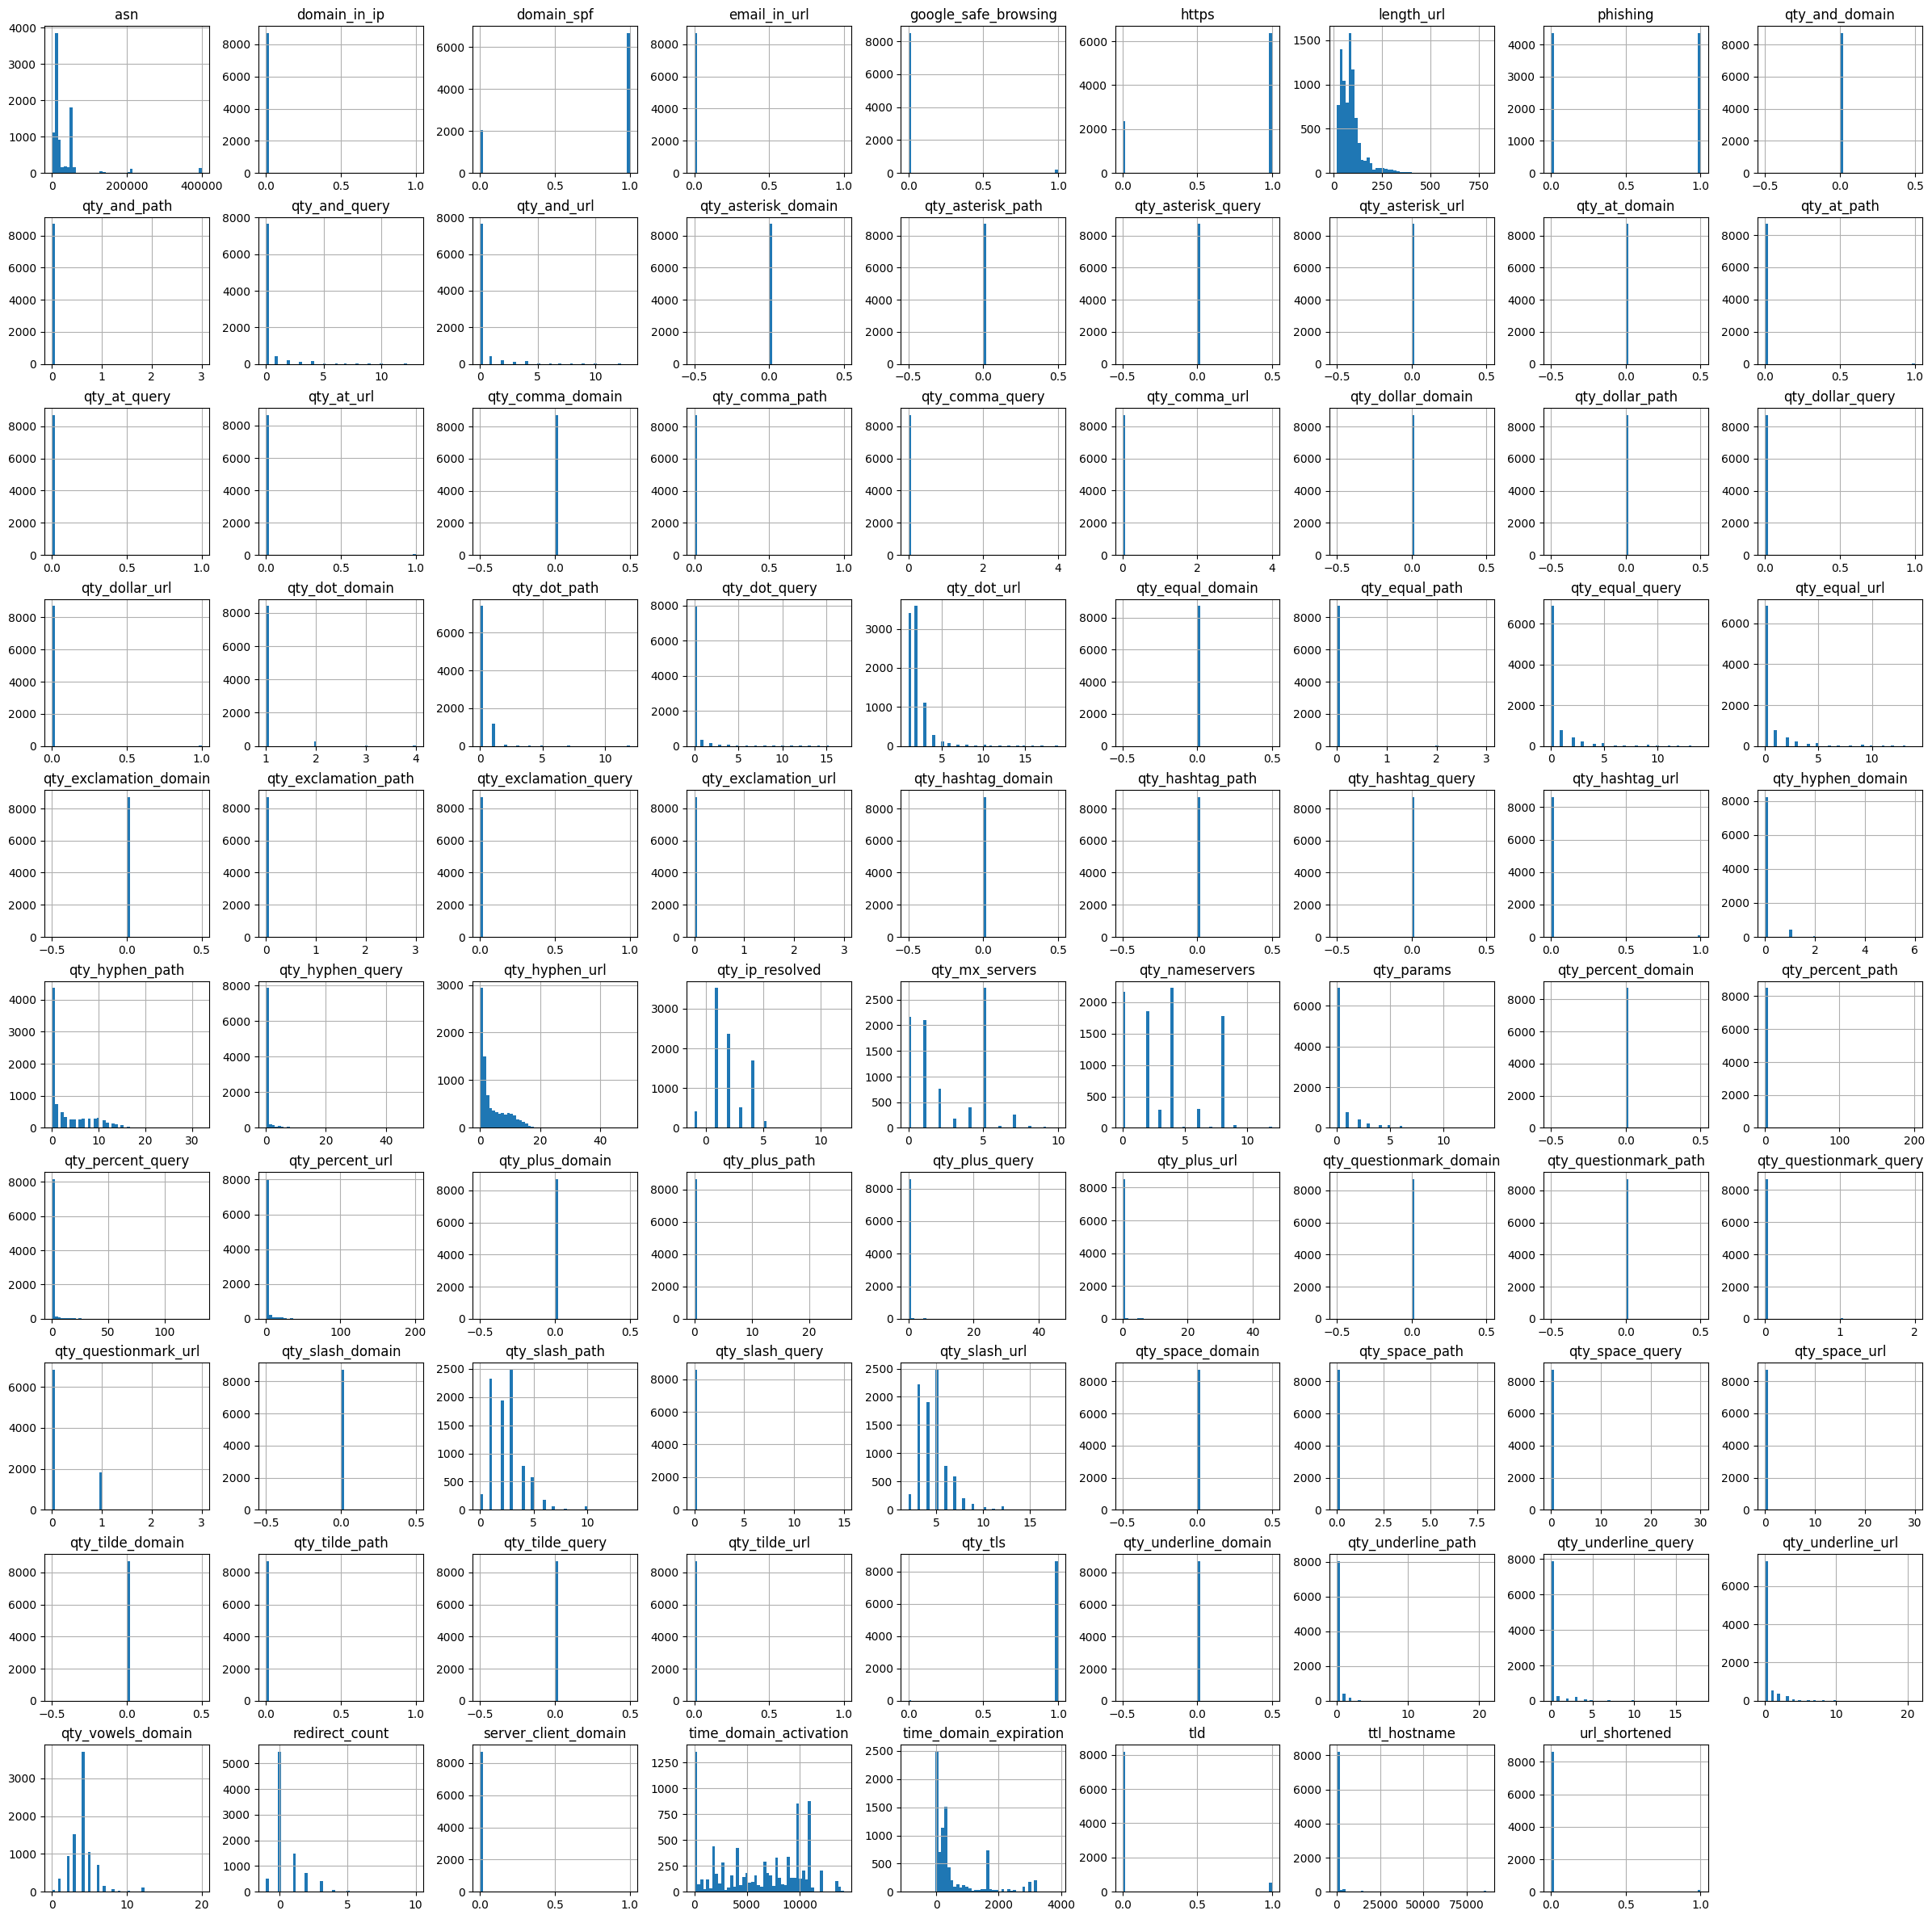

In [ ]:
# Plotting the data distribution
data.hist(bins = 50,figsize = (30,30))
plt.show()

In [ ]:
# TODO: Correlation heatmap
plt.figure(figsize=(15,13))
plt.show()

<Figure size 1500x1300 with 0 Axes>

In [ ]:
# Checking the data for null or missing values
data = data.dropna()
data.isnull().sum()

asn                        0
domain_in_ip               0
domain_spf                 0
email_in_url               0
google_safe_browsing       0
https                      0
length_url                 0
phishing                   0
qty_and_domain             0
qty_and_path               0
qty_and_query              0
qty_and_url                0
qty_asterisk_domain        0
qty_asterisk_path          0
qty_asterisk_query         0
qty_asterisk_url           0
qty_at_domain              0
qty_at_path                0
qty_at_query               0
qty_at_url                 0
qty_comma_domain           0
qty_comma_path             0
qty_comma_query            0
qty_comma_url              0
qty_dollar_domain          0
qty_dollar_path            0
qty_dollar_query           0
qty_dollar_url             0
qty_dot_domain             0
qty_dot_path               0
qty_dot_query              0
qty_dot_url                0
qty_equal_domain           0
qty_equal_path             0
qty_equal_quer

An Autonomous System Number (ASN) should be excluded from training features because its values are impacting the model's training effectiveness.

In [ ]:
cols_to_drop = ['url', 'asn']
data = data.drop(columns=cols_to_drop)

In [ ]:
pd.options.display.max_rows = 999

# Step 1: Calculate the correlation matrix
corr_matrix = data.corr()

# Step 2: Select the 'phishing' column
phishing_corr = corr_matrix['phishing']

# Step 3: Identify features with NaN values
features_to_drop = phishing_corr[phishing_corr.isna()].index.tolist()

# Step 4: Drop those features from the original DataFrame
data = data.drop(columns=features_to_drop)

print(f"Features to drop: {features_to_drop}")
data.corr()

Features to drop: ['qty_and_domain', 'qty_asterisk_domain', 'qty_asterisk_path', 'qty_asterisk_query', 'qty_asterisk_url', 'qty_at_domain', 'qty_comma_domain', 'qty_dollar_domain', 'qty_dollar_path', 'qty_equal_domain', 'qty_exclamation_domain', 'qty_hashtag_domain', 'qty_hashtag_path', 'qty_hashtag_query', 'qty_percent_domain', 'qty_plus_domain', 'qty_questionmark_domain', 'qty_questionmark_path', 'qty_slash_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_tilde_query', 'qty_underline_domain']


,domain_in_ip,domain_spf,email_in_url,google_safe_browsing,https,length_url,phishing,qty_and_path,qty_and_query,qty_and_url,...,qty_underline_query,qty_underline_url,qty_vowels_domain,redirect_count,server_client_domain,time_domain_activation,time_domain_expiration,tld,ttl_hostname,url_shortened
domain_in_ip,1.000000,-0.072638,-0.002020,0.236586,-0.066232,0.162919,0.040184,-0.000745,0.157246,0.156898,...,0.064815,0.047163,-0.093321,-0.004880,-0.001877,-0.059399,-0.028277,0.131633,-0.005724,-0.004216
domain_spf,-0.072638,1.000000,-0.047857,-0.134209,-0.002997,0.150947,-0.448992,-0.026293,0.115837,0.115188,...,0.102480,0.120498,0.038059,0.246577,0.008400,0.488790,-0.126404,0.099124,0.069119,0.029313
email_in_url,-0.002020,-0.047857,1.000000,0.021909,0.030506,0.036047,0.041244,-0.000935,-0.003877,-0.003935,...,-0.010174,-0.012187,0.007038,-0.010318,-0.002354,-0.039273,0.015919,0.062546,0.003119,-0.005288
google_safe_browsing,0.236586,-0.134209,0.021909,1.000000,0.012515,-0.039863,0.157417,-0.002920,0.009956,0.009734,...,-0.017541,-0.029780,-0.004091,-0.073849,-0.007354,-0.153103,-0.036694,-0.003551,0.056111,-0.009311
https,-0.066232,-0.002997,0.030506,0.012515,1.000000,-0.204081,-0.488003,-0.009693,-0.160263,-0.159725,...,-0.067085,-0.106199,0.073259,-0.303714,-0.043856,0.051030,0.076826,-0.009208,-0.050136,0.041208
length_url,0.162919,0.150947,0.036047,-0.039863,-0.204081,1.000000,-0.022103,0.002305,0.496760,0.496851,...,0.352341,0.392788,-0.013948,0.127203,-0.000086,0.132643,0.023216,0.504307,-0.051556,-0.081838
phishing,0.040184,-0.448992,0.041244,0.157417,-0.488003,-0.022103,1.000000,0.006211,-0.055112,-0.055493,...,-0.128306,-0.080834,-0.103775,0.046620,0.046826,-0.352862,0.119154,-0.065620,0.081454,-0.007620
qty_and_path,-0.000745,-0.026293,-0.000935,-0.002920,-0.009693,0.002305,0.006211,1.000000,-0.005007,0.021159,...,0.004093,0.001143,0.009158,0.009533,-0.000868,-0.017286,-0.009956,-0.004799,-0.002520,-0.001951
qty_and_query,0.157246,0.115837,-0.003877,0.009956,-0.160263,0.496760,-0.055112,-0.005007,1.000000,0.997772,...,0.593985,0.510077,-0.000491,-0.015056,-0.012612,0.108744,0.060623,0.181849,0.012056,-0.020516
qty_and_url,0.156898,0.115188,-0.003935,0.009734,-0.159725,0.496851,-0.055493,0.021159,0.997772,1.000000,...,0.592778,0.508958,-0.000434,-0.013882,-0.012649,0.108637,0.061021,0.181172,0.011861,-0.020613


In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,domain_in_ip,domain_spf,email_in_url,google_safe_browsing,https,length_url,phishing,qty_and_path,qty_and_query,qty_and_url,...,qty_underline_query,qty_underline_url,qty_vowels_domain,redirect_count,server_client_domain,time_domain_activation,time_domain_expiration,tld,ttl_hostname,url_shortened
0,0,1,0,0.0,1,235,0,0,4,4,...,3,3,4,1,0,0,0,0,0,0
1,0,1,0,0.0,1,75,1,0,0,0,...,0,0,4,3,0,9713,1607,0,104,0
2,0,1,0,0.0,0,85,1,0,0,0,...,0,0,4,0,0,5739,104,0,300,0
3,0,1,0,0.0,0,37,0,0,0,0,...,0,0,6,1,0,5038,162,0,3600,0
4,0,1,0,0.0,0,194,0,0,12,12,...,10,10,5,0,0,9196,300,0,211,0


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['phishing']
X = data.drop('phishing',axis=1)
X.shape, y.shape

((8704, 64), (8704,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((6963, 64), (1741, 64))

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
true_positives = []
false_positives = []
true_negatives = []
false_negatives = []
sensitivity_list = []
specificity_list = []
precision_list = []
f1_list = []
percent_tp = []
percent_fp = []
percent_tn = []
percent_fn = []

# Function to call for storing the results
def storeResults(model, a, b, tp, fp, tn, fn, sensitivity, specificity, precision, f1):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    true_positives.append(tp)
    false_positives.append(fp)
    true_negatives.append(tn)
    false_negatives.append(fn)
    sensitivity_list.append(round(sensitivity, 3))
    specificity_list.append(round(specificity, 3))
    precision_list.append(round(precision, 3))
    f1_list.append(round(f1, 3))

    total = tp + fp + tn + fn
    percent_tp.append(round((tp / total) * 100, 2))
    percent_fp.append(round((fp / total) * 100, 2))
    percent_tn.append(round((tn / total) * 100, 2))
    percent_fn.append(round((fn / total) * 100, 2))


## Decision Tree Model

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

In [ ]:
cm = confusion_matrix(y_test, y_test_tree)

# Extract true positives, false positives, true negatives, and false negatives
tn_tree, fp_tree, fn_tree, tp_tree = cm.ravel()

# Compute additional metrics
precision_tree = precision_score(y_test, y_test_tree)
recall_tree = recall_score(y_test, y_test_tree)
f1_tree = f1_score(y_test, y_test_tree)

# Sensitivity, also called recall
sensitivity_tree = recall_tree

# Specificity
specificity_tree = tn_tree / (tn_tree + fp_tree)

print(f"True Positives: {tp_tree}")
print(f"False Positives: {fp_tree}")
print(f"True Negatives: {tn_tree}")
print(f"False Negatives: {fn_tree}")
print(f"Sensitivity (Recall): {sensitivity_tree:.3f}")
print(f"Specificity: {specificity_tree:.3f}")
print(f"Precision: {precision_tree:.3f}")
print(f"F1 Score: {f1_tree:.3f}")

In [ ]:
# Get feature importances and sort them in descending order
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
top_20_indices = indices[:20]

# Select the top 20 features and their importances
top_20_features = X_train.columns[top_20_indices]
top_20_importances = importances[top_20_indices]

# Plotting the top 20 features
plt.figure(figsize=(12, 10))
plt.barh(range(len(top_20_features)), top_20_importances, align='center')
plt.yticks(range(len(top_20_features)), top_20_features)
plt.gca().invert_yaxis()  # Invert y axis to have the most important at the top
plt.xlabel("Znaczenie cechy")
plt.ylabel("Cecha")
plt.title("Najważniejszych 20 cech dla Drzewa Decyzyjnego")
plt.show()


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree, tp_tree, fp_tree, tn_tree, fn_tree, sensitivity_tree, specificity_tree, precision_tree, f1_tree)

## Random Forest Model

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

In [ ]:
cm = confusion_matrix(y_test, y_test_forest)

# Extract true positives, false positives, true negatives, and false negatives
tn_forest, fp_forest, fn_forest, tp_forest = cm.ravel()

# Compute additional metrics
precision_forest = precision_score(y_test, y_test_forest)
recall_forest = recall_score(y_test, y_test_forest)
f1_forest = f1_score(y_test, y_test_forest)

# Sensitivity, also called recall
sensitivity_forest = recall_forest

# Specificity
specificity_forest = tn_forest / (tn_forest + fp_forest)

print(f"True Positives: {tp_forest}")
print(f"False Positives: {fp_forest}")
print(f"True Negatives: {tn_forest}")
print(f"False Negatives: {fn_forest}")
print(f"Sensitivity (Recall): {sensitivity_forest:.3f}")
print(f"Specificity: {specificity_forest:.3f}")
print(f"Precision: {precision_forest:.3f}")
print(f"F1 Score: {f1_forest:.3f}")

In [ ]:
# Get feature importances and sort them in descending order
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
top_20_indices = indices[:20]

# Select the top 20 features and their importances
top_20_features = X_train.columns[top_20_indices]
top_20_importances = importances[top_20_indices]

# Plotting the top 20 features
plt.figure(figsize=(12, 10))
plt.barh(range(len(top_20_features)), top_20_importances, align='center')
plt.yticks(range(len(top_20_features)), top_20_features)
plt.gca().invert_yaxis()  # Invert y axis to have the most important at the top
plt.xlabel("Znaczenie cechy")
plt.ylabel("Cecha")
plt.title("Najważniejszych 20 cech dla Lasów Losowych")
plt.show()


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest, tp_forest, fp_forest, tn_forest, fn_forest, sensitivity_forest, specificity_forest, precision_forest, f1_forest)

## Multilayer Perceptrons (MLPs): Deep Learning

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance with random state 42
result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature names if available, otherwise create indices
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

# Plot feature importance
sorted_idx = result.importances_mean.argsort()
top_n = 20  # Display the top 20 features
plt.figure(figsize=(12, 10))
plt.barh(range(top_n), result.importances_mean[sorted_idx][-top_n:], align='center')
plt.yticks(range(top_n), np.array(feature_names)[sorted_idx][-top_n:])
plt.xlabel("Znaczenie permutacji")
plt.title("Znaczenie cech dla klasyfikatora MLP")
plt.ylabel("Cechy")
plt.tight_layout()
plt.show()



In [ ]:
cm = confusion_matrix(y_test, y_test_mlp)

# Extract true positives, false positives, true negatives, and false negatives
tn_mlp, fp_mlp, fn_mlp, tp_mlp = cm.ravel()

# Compute additional metrics
precision_mlp = precision_score(y_test, y_test_mlp)
recall_mlp = recall_score(y_test, y_test_mlp)
f1_mlp = f1_score(y_test, y_test_mlp)

# Sensitivity, also called recall
sensitivity_mlp = recall_mlp

# Specificity
specificity_mlp = tn_mlp / (tn_mlp + fp_mlp)

print(f"True Positives: {tp_mlp}")
print(f"False Positives: {fp_mlp}")
print(f"True Negatives: {tn_mlp}")
print(f"False Negatives: {fn_mlp}")
print(f"Sensitivity (Recall): {sensitivity_mlp:.3f}")
print(f"Specificity: {specificity_mlp:.3f}")
print(f"Precision: {precision_mlp:.3f}")
print(f"F1 Score: {f1_mlp:.3f}")


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('MLP', acc_train_mlp, acc_test_mlp, tp_mlp, fp_mlp, tn_mlp, fn_mlp, sensitivity_mlp, specificity_mlp, precision_mlp, f1_mlp)


## XGBoost Classifier

In [ ]:
# install optuna package for model optimization
!pip install optuna
!pip install optuna_integration

In [ ]:
# import packages for optimization and model training
import numpy as np
import optuna
import optuna_integration
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.999
XGBoost : Accuracy on test Data: 0.978


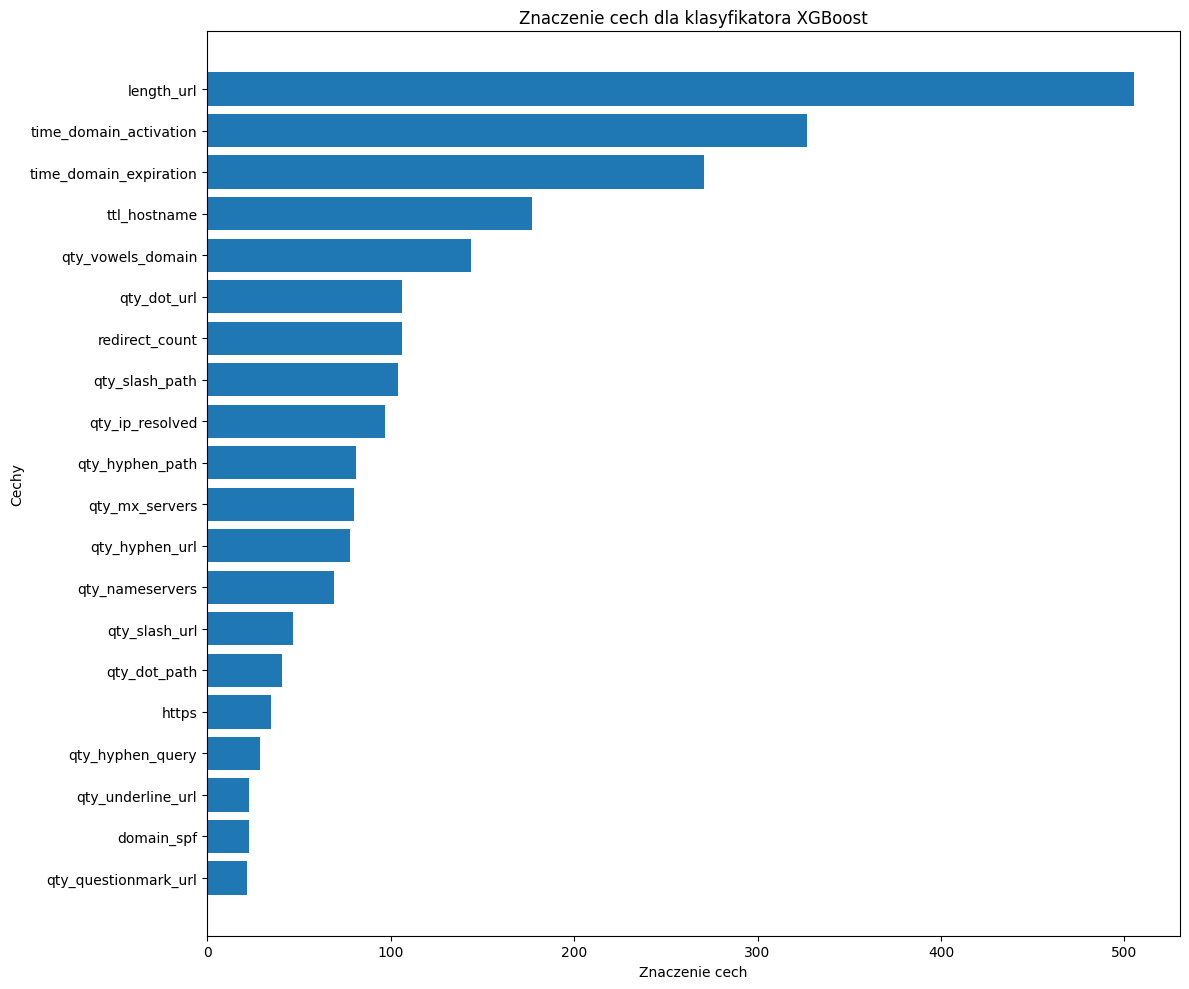

In [ ]:
from xgboost import plot_importance

# Get feature importances
importance_dict = xgb.get_booster().get_score(importance_type='weight')
importances = pd.Series(importance_dict).sort_values(ascending=False)

# Get the top 20 features
top_20_importances = importances[:20]
top_20_features = top_20_importances.index

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(range(len(top_20_features)), top_20_importances.values, align='center')
plt.yticks(range(len(top_20_features)), top_20_features)
plt.gca().invert_yaxis()  # Invert y axis to have the most important at the top
plt.xlabel("Znaczenie cech")
plt.ylabel("Cechy")
plt.title("Znaczenie cech dla klasyfikatora XGBoost")
plt.tight_layout()
plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_test_xgb)

# Extract true positives, false positives, true negatives, and false negatives
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm.ravel()

# Compute additional metrics
precision_xgb = precision_score(y_test, y_test_xgb)
recall_xgb = recall_score(y_test, y_test_xgb)
f1_xgb = f1_score(y_test, y_test_xgb)

# Sensitivity, also called recall
sensitivity_xgb = recall_xgb

# Specificity
specificity_xgb = tn_xgb / (tn_xgb + fp_xgb)

print(f"True Positives: {tp_xgb}")
print(f"False Positives: {fp_xgb}")
print(f"True Negatives: {tn_xgb}")
print(f"False Negatives: {fn_xgb}")
print(f"Sensitivity (Recall): {sensitivity_xgb:.3f}")
print(f"Specificity: {specificity_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"F1 Score: {f1_xgb:.3f}")

True Positives: 840
False Positives: 23
True Negatives: 862
False Negatives: 16
Sensitivity (Recall): 0.981
Specificity: 0.974
Precision: 0.973
F1 Score: 0.977


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb, tp_xgb, fp_xgb, tn_xgb, fn_xgb, sensitivity_xgb, specificity_xgb, precision_xgb, f1_xgb)

## Supported Vector Machines

In [ ]:
#Support vector machine model
from sklearn.svm import LinearSVC

# instantiate the model
svm = LinearSVC(C=1.0, random_state=42, max_iter=1000)
#fit the model
svm.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

In [ ]:
# Get the coefficients
coefficients = svm.coef_[0]

# Get feature names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
importance_df['Absolute Importance'] = np.abs(importance_df['Importance'])
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

# Select the top 20 features
top_20_features = importance_df.head(20)

# Plot the absolute feature importances
plt.figure(figsize=(12, 10))
plt.barh(range(len(top_20_features)), top_20_features['Absolute Importance'], align='center')
plt.yticks(range(len(top_20_features)), top_20_features['Feature'])
plt.gca().invert_yaxis()  # Invert y axis to have the most important at the top
plt.xlabel("Znaczenie cech (wartość bezwzględna)")
plt.ylabel("Cechy")
plt.title("Znaczenie cech dla klasyfikatora SVM")
plt.tight_layout()
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_test_svm)

# Extract true positives, false positives, true negatives, and false negatives
tn_svm, fp_svm, fn_svm, tp_svm = cm.ravel()

# Compute additional metrics
precision_svm = precision_score(y_test, y_test_svm)
recall_svm = recall_score(y_test, y_test_svm)
f1_svm = f1_score(y_test, y_test_svm)

# Sensitivity, also called recall
sensitivity_svm = recall_svm

# Specificity
specificity_svm = tn_svm / (tn_svm + fp_svm)

print(f"True Positives: {tp_svm}")
print(f"False Positives: {fp_svm}")
print(f"True Negatives: {tn_svm}")
print(f"False Negatives: {fn_svm}")
print(f"Sensitivity (Recall): {sensitivity_svm:.3f}")
print(f"Specificity: {specificity_svm:.3f}")
print(f"Precision: {precision_svm:.3f}")
print(f"F1 Score: {f1_svm:.3f}")

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm, tp_svm, fp_svm, tn_svm, fn_svm, sensitivity_svm, specificity_svm, precision_svm, f1_svm)

## Model Comparison

In [ ]:
# Creating a DataFrame to store the results
results = pd.DataFrame({
    'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'True Positives': true_positives,
    'False Positives': false_positives,
    'True Negatives': true_negatives,
    'False Negatives': false_negatives,
    'Sensitivity (Recall)': sensitivity_list,
    'Specificity': specificity_list,
    'Precision': precision_list,
    'F1 Score': f1_list,
    'Percentage True Positives': percent_tp,
    'Percentage False Positives': percent_fp,
    'Percentage True Negatives': percent_tn,
    'Percentage False Negatives': percent_fn
})

results

In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

In [ ]:
# save XGBoost best after optuna model to file
import pickle
pickle.dump(best_model, open("XGBoostClassifier-best-model.pickle.dat", "wb"))

In [ ]:
# save MLP  model to file
import pickle
pickle.dump(mlp, open("MLPClassifier.pickle.dat", "wb"))

In [ ]:
# save Forest model to file
import pickle
pickle.dump(forest, open("ForestClassifier.pickle.dat", "wb"))

In [ ]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier-plus-features.pickle.dat", "rb"))
loaded_model